In [3]:
# import lib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

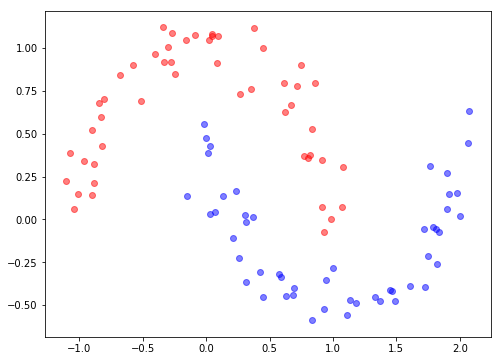

In [14]:
# See the data 
X, y = make_moons(n_samples=100, noise=0.1)
plt.figure(figsize=(8,6))
plt.scatter(X[y==0, 0], X[y==0, 1], color='red', alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', alpha=0.5)
plt.show()

In [21]:
# traditional
cov = X.T @ X / X.shape[0]
evalue,evector = np.linalg.eigh(cov)
idx = 
print(evalue)
print(cov)

[0.31482889 1.01724706]
[[ 1.00830698 -0.07873849]
 [-0.07873849  0.32376897]]


In [17]:
# simple method
w = np.random.randn(2,1)
print(np.sqrt(np.sum(w**2)))
w = w/(np.sqrt(np.sum(w**2)))
print(np.sqrt(np.sum(w**2)))
print(w.shape)


1.1259752307649025
1.0
(2, 1)
